In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
%matplotlib inline

In [136]:
df=pd.read_excel('Insurance.xlsx')

In [137]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [138]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [140]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [141]:
df.shape

(1338, 7)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

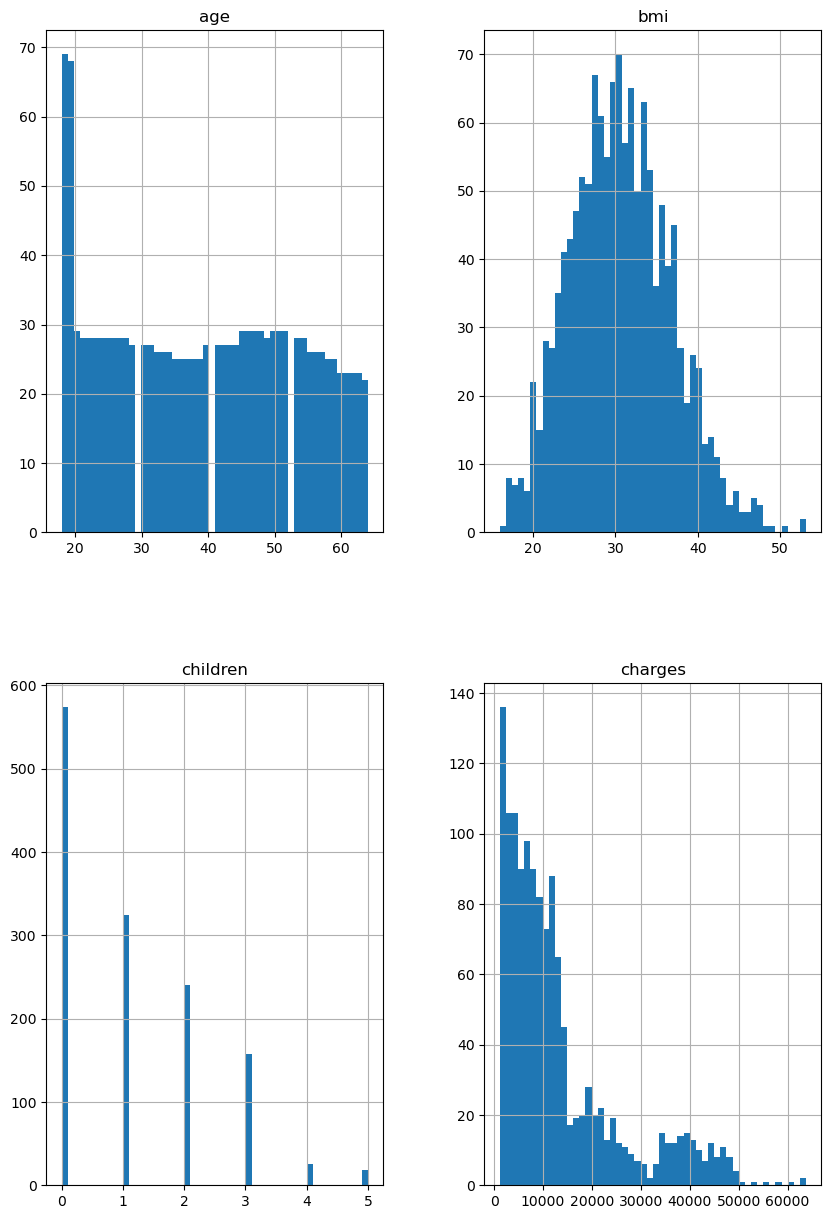

In [142]:
df.hist(bins=50, figsize=(10,15))

In [143]:
df.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [144]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [145]:
x=df.drop(['charges'],axis=1)

In [146]:
y=df['charges']

In [147]:
train_x,test_x,train_y,test_y= train_test_split(x,y,test_size=0.2,random_state=42)

In [148]:

cat_x=[1,4,5]


In [149]:
num_x=[0,2,3]

In [150]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [151]:
trf1 = ColumnTransformer([
    ('ohe_sex_embarked',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,4,5])
    
],remainder='passthrough')

In [152]:
trf2=ColumnTransformer([
      ('scaler',MinMaxScaler(),slice(0,11))

])

In [153]:
trf3=RandomForestRegressor(n_estimators=100)

In [154]:
pipe=make_pipeline(trf1,trf2,trf3)

In [155]:
pipe.fit(train_x,train_y)

C:\Users\Afreen\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 4, 5])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  slice(0, 11, None))])),
                ('randomforestregressor', RandomForestRegressor())])

In [156]:
predicted=pipe.predict(test_x)

In [157]:
predicted

array([ 9530.7270869 ,  5034.6399985 , 28298.4884245 , 11033.9216213 ,
       34740.3742224 ,  9686.6836113 ,  2117.7738845 , 14675.1886999 ,
        5518.7754949 , 11285.801943  , 19017.0543794 ,  7525.1788148 ,
        4569.2582721 , 45768.8804313 , 48486.0748883 , 45135.533173  ,
        9853.5043452 , 42918.7693905 ,  8815.5267009 , 24212.7230196 ,
        5427.0385946 ,  9584.5211653 ,  1659.0359982 ,  2944.5137722 ,
       11913.1683691 , 11510.6061264 , 13617.5617746 ,  6717.6835247 ,
       10596.779307  ,  3971.00570355,  8007.4527756 , 11938.8604806 ,
        4537.5097294 ,  5726.0675673 ,  3860.1891027 , 11323.1870889 ,
        2424.8172175 ,  7586.8932381 , 23733.373454  , 39334.215774  ,
        6268.9692928 ,  4479.4466908 , 12953.4513084 , 14452.522951  ,
        5723.3859779 , 15723.0521489 , 20434.3822315 ,  7004.7902425 ,
       41544.4812617 ,  7557.412704  , 14468.0256835 ,  2129.3173018 ,
        6598.7835999 ,  1735.5612935 , 13044.3137943 , 11328.1158948 ,
      

In [158]:
error=mean_squared_error(test_y,predicted)

In [159]:
import math
rmse=math.sqrt(error)

In [160]:
rmse

4645.456530855068

In [161]:

r2=r2_score(test_y,predicted)

In [162]:
r2

0.8609955381103547

In [163]:
#model is able to capture a significant portion (86%) of the variability in the target variable.